# Tacademy - (1). Python을 활용한 데이터분석 실습

### 1. 강남 출근길에 정자_판교 내릴 사람 예측하기

* EDA : 쌓여 있는 데이터를 기반으로 가설을 세워 데이터를 분석하는 방법<br>

    * 수집 --> 탐색/정제 --> 모델링 --> 결과 <br>
    
    * Missing value --> default 처리 / drop / KNN input 등등... <br>
   
    (Feature Distribution Plot?? / Column Value Validation??) <br>
        
        
* CDA : 목적을 가지고 데이터를 수집하고 분석하는 방법

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

%cd C:\Users\hanbum\Desktop\2018\work\2. Project\3. Personal\tacademy\1. python_eda
%pwd

C:\Users\hanbum\Desktop\2018\work\2. Project\3. Personal\tacademy\1. python_eda


'C:\\Users\\hanbum\\Desktop\\2018\\work\\2. Project\\3. Personal\\tacademy\\1. python_eda'

In [128]:
raw = pd.read_csv('passenser_raw.data' ,engine='python', encoding='utf-8',sep=' / ')

In [129]:
raw.head()

,platform_loc,ride_time,path,info
0,2-1,2017-07-13 07:30,동천 -> 강남,여3핸정노 남4핸정노 남3잠정이 남3핸세이 여3노세이:판 여5핸평노:판 남3잠정이
1,2-1,2017-07-14 08:25,동천 -> 강남,남3핸정노 남4핸세이:판 남4핸평노:정 여5잠평노 남3잠평노 여3핸세이 여3핸평노
2,2-1,2017-07-17 08:17,동천 -> 강남,여2핸평이:정 여3잠세이:판 남4잠세노 여3핸세노 남3책평이 여4잠세노:판 여3현세이
3,2-1,2017-07-18 08:40,동천 -> 강남,여2핸평이:정 남3핸세노 남4핸평노:정 남2핸평노 여3잠세노 여2핸평노 여3핸평노:정
4,2-1,2017-07-19 08:20,동천 -> 강남,여2핸평이:판 여2핸평이 여2잠평노 남4잠정노 여3잠정노 여3핸평이 여4현세이


In [130]:
raw.columns

Index(['platform_loc', 'ride_time', 'path', 'info'], dtype='object')

In [131]:
raw['day'] = raw.ride_time.apply(lambda x:x[:10])
raw['hour'] = raw.ride_time.apply(lambda x:x[-5:])

In [132]:
## convert abbrivation to whole word 
gender_dict = {"남":"남자", "여":"여자"}
to_age = lambda x: int(x) * 10
action_dict = {"핸":"핸드폰보기", "생":"생각중", "토":"토크", "책": "책읽기", "노": "노트북", "잠":"잠자는중"}
dress_code_dict = {"정":"정장", "세":"세미정장", "평":"평상복"}
earphone_dict = {"이":"이어폰:O", "노":"이어폰:X"}
station_dict = {"정":"정자역", "판":"판교역"}

def parsePassengerInfo(info):
    """
    parsing passenger information as a labels 
    
    """
    gender = gender_dict.get(info[0], "남자")
    age = to_age(info[1])
    action = action_dict.get(info[2], "생각중")
    dress = dress_code_dict.get(info[3], "평상복")
    is_earphone = earphone_dict.get(info[4], "이어폰사용안함")

    splited_info = info.split(":")
    exit_station = station_dict.get(splited_info[1], "강남역") if len(splited_info)==2 else "강남역"
    
    return [gender, age, action, dress, is_earphone, exit_station]

In [133]:
passenger_info_list = []
for day, hour, info_list in raw[['day','hour','info']].values:
    passenger_info_list.extend([[day, hour, seat_loc] + parsePassengerInfo(info) \
                                for seat_loc, info in enumerate(info_list.split())] )

In [134]:
raw = pd.DataFrame(passenger_info_list
                , columns=['day', 'hour', 'seat_loc', '성별', '나이', '행동', '복장', '이어폰여부', '내리는역'])

In [137]:
print("측정 일수   \t: %4d 일" % len(raw.day.unique()))
print("측정 승객수  \t: %4d 명" % raw.shape[0])
print("측정(출근) 시간\t: %s ~ %s" % (raw.hour.min(),raw.hour.max()) )

측정 일수   	:   46 일
측정 승객수  	:  322 명
측정(출근) 시간	: 07:07 ~ 08:52


In [139]:
## seat location 
seat_to_group = {
    0:"좌측:사이드",
    1:"좌측:사이드",
    2:"중앙", 
    3:"중앙", 
    4:"중앙",
    5:"우측:사이드", 
    6:"우측:사이드"
}

raw['좌석위치'] = raw['seat_loc'].apply(seat_to_group.get)

## station 
raw['내리는역'] = raw['내리는역'].apply( lambda x: "강남역" if x == "강남역" else "판교/정자역")

## age 
age_to_group = {
    10:"청년",
    20:"청년",
    30:"중년",
    40:"중년",
    50:"장년",
    60:"장년"
}

raw['연령대'] = raw['나이'].apply(age_to_group.get)
raw['count'] = 1

In [141]:
passenger = raw

In [142]:
passenger.head()

,day,hour,seat_loc,성별,나이,행동,복장,이어폰여부,내리는역,좌석위치,연령대,count
0,2017-07-13,07:30,0,여자,30,핸드폰보기,정장,이어폰:X,강남역,좌측:사이드,중년,1
1,2017-07-13,07:30,1,남자,40,핸드폰보기,정장,이어폰:X,강남역,좌측:사이드,중년,1
2,2017-07-13,07:30,2,남자,30,잠자는중,정장,이어폰:O,강남역,중앙,중년,1
3,2017-07-13,07:30,3,남자,30,핸드폰보기,세미정장,이어폰:O,강남역,중앙,중년,1
4,2017-07-13,07:30,4,여자,30,노트북,세미정장,이어폰:O,판교/정자역,중앙,중년,1


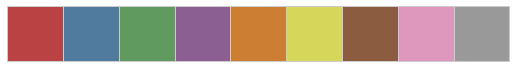

In [163]:
sns.set(style="whitegrid", rc={'font.family':'nanumsquare', 'figure.figsize': (12, 5)}, font_scale=1.4)
pal = sns.color_palette("Set1", n_colors=9, desat=.6)
sns.palplot(pal)
sns.set_palette(pal)

In [149]:
print("%d일 %d명 신분당선 지하철 승객 데이터 " % ( len(passenger.day.unique()), passenger.shape[0]) )

46일 322명 신분당선 지하철 승객 데이터 


In [156]:
passenger.groupby('내리는역').count()[['count']]/322

,count
내리는역,
강남역,0.779503
판교/정자역,0.220497


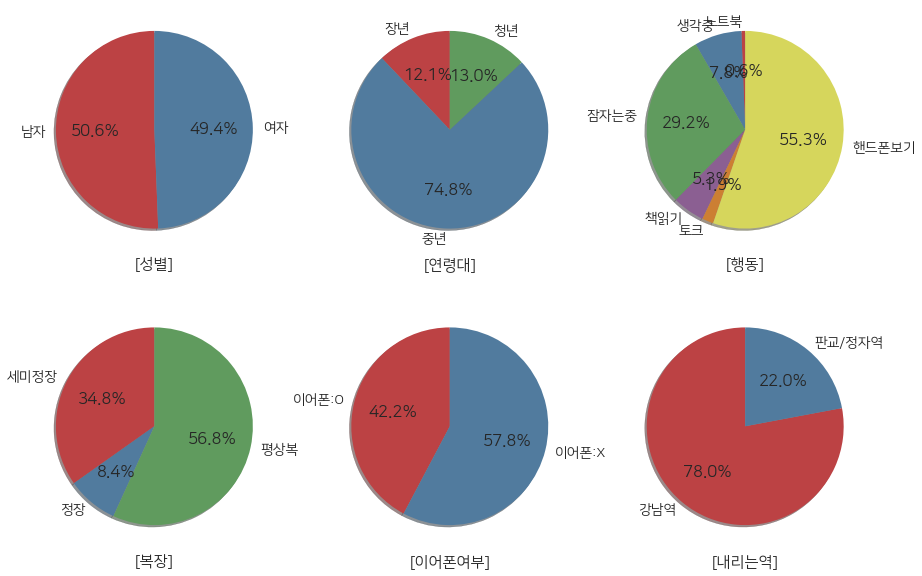

In [164]:
(plot_rows, plot_cols) = (2, 3)
size = 5

f, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_cols*size,plot_rows*size))
axes = np.concatenate(axes)

for (ax, col) in zip(axes,['성별', '연령대', '행동', '복장', '이어폰여부', '내리는역']):
    grouped = passenger.groupby(col).count()[['count']]
    grouped.plot(kind='pie', y='count', subplots=False, autopct='%1.1f%%', ax=ax, legend=False
                    , shadow=True, startangle=90,)
    ax.set_xlabel("["+col+"]")
    ax.set_ylabel('')

In [165]:
def drawCommonPassenger(ds, topn=10, color=None):
    ds.groupby(['복장', '행동', '나이','성별'], as_index=True)\
                .agg({'count':len})\
                .sort_values('count', ascending=False)[:topn]\
                .sort_values('count', ascending=True)\
                .plot(kind='barh', color=color, figsize=(6,int(topn/1.5)), title='가장 흔한 승객 유형 Top %d 보는 유형'  % topn )
    plt.ylabel("")

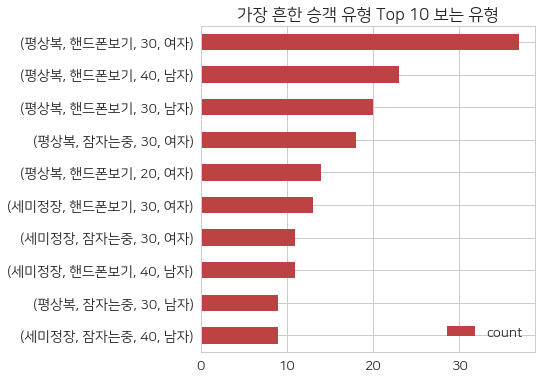

In [166]:
drawCommonPassenger(passenger, topn=10)

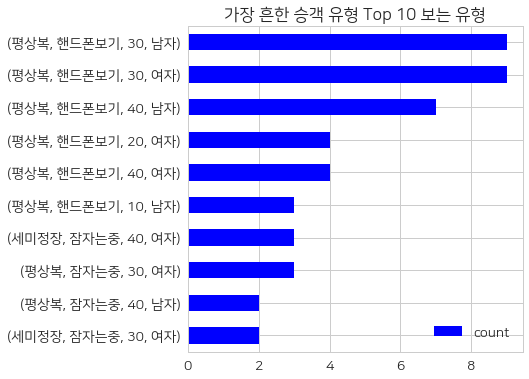

In [168]:
drawCommonPassenger(passenger[passenger["내리는역"]=='판교/정자역'], color='b')

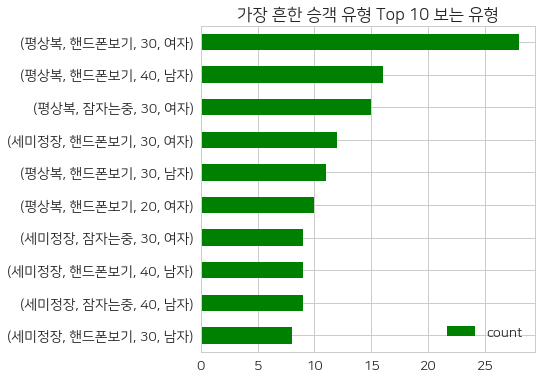

In [169]:
drawCommonPassenger(passenger[passenger["내리는역"]=='강남역'], color='g')

In [170]:
def drawCompareFeature(ds, feature1, feature2, title="", color=None):
    grouped_ds = ds.groupby([feature1, feature2], as_index=False)[['count']]\
            .count()\
            .pivot_table(index=feature2, columns=feature1, values='count', fill_value=0)\
    
    fig1, (ax1, ax2) = plt.subplots(ncols=2,  figsize=(15,5))
    grouped_ds.plot(kind='bar', stacked=True,alpha=1, ax=ax1, color=color)
    ((grouped_ds.T/grouped_ds.sum(axis=1)).T).plot(kind='bar', stacked=True,alpha=1, ax=ax2, color=color)
    plt.tight_layout(pad=1.1)
    #return grouped_ds

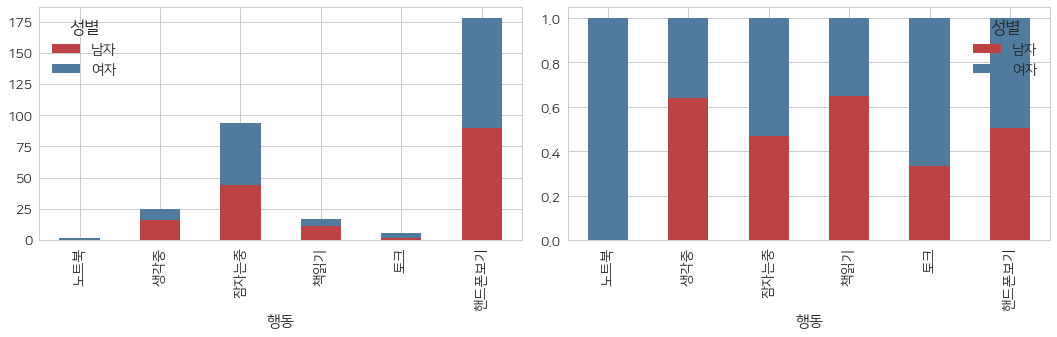

In [171]:
drawCompareFeature(passenger, '성별', '행동', "성별에 따른 행동비교")

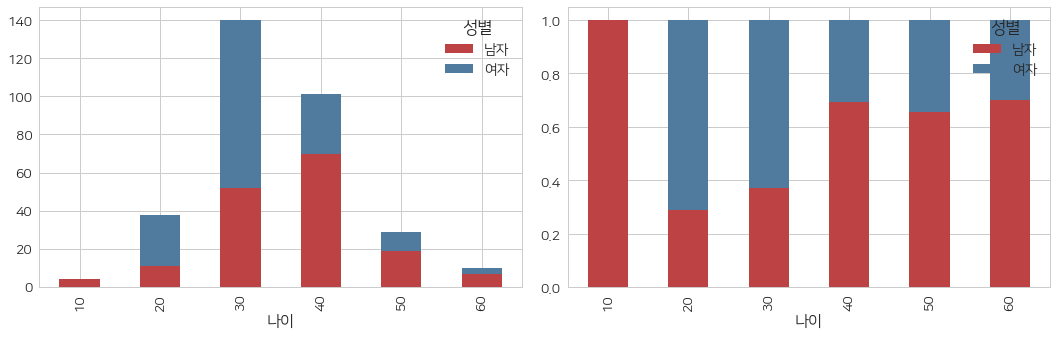

In [175]:
drawCompareFeature(passenger, '성별', '나이', "성별에 따른 나이분포")

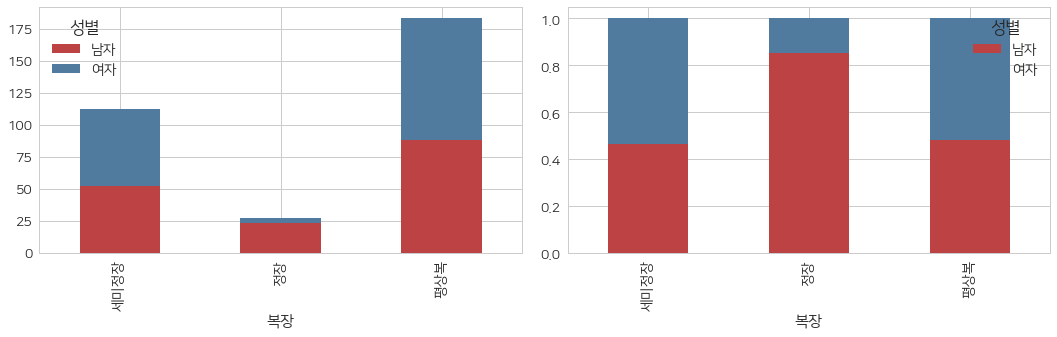

In [177]:
drawCompareFeature(passenger, '성별', '복장', "성별에 따른 복장비교")

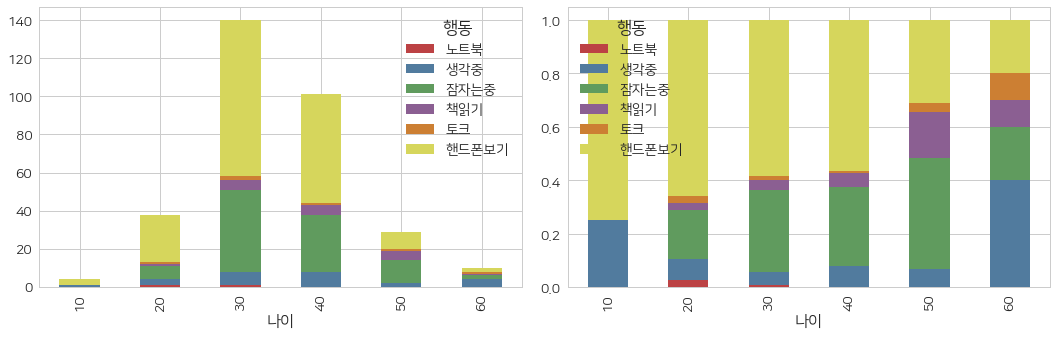

In [179]:
drawCompareFeature(passenger, '행동', '나이', "나이에 따른 행동비교")

### Encoding
    
* label encoding(integer encoding)
* one hot encoding(binary encoding)

In [281]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import defaultdict

passenger.rename(columns={'하차여부':'내리는역'}, inplace=True)

In [282]:
lb = passenger['내리는역 성별 연령대 행동 이어폰여부 좌석위치'.split()]

lb.head(3)

,내리는역,성별,연령대,행동,이어폰여부,좌석위치
0,강남역,여자,중년,핸드폰보기,이어폰:X,좌측:사이드
1,강남역,남자,중년,핸드폰보기,이어폰:X,좌측:사이드
2,강남역,남자,중년,잠자는중,이어폰:O,중앙


In [300]:
# label encoding 
le_enc_dict = defaultdict(LabelEncoder)

le_passenger = passenger.apply(lambda x:le_enc_dict[x.name].fit_transform(x))

le_passenger = le_passenger['내리는역 성별 연령대 행동 이어폰여부 좌석위치'.split()]

le_passenger.to_csv('label.csv',index=None)

In [301]:
le_passenger.head()

,내리는역,성별,연령대,행동,이어폰여부,좌석위치
0,0,1,1,5,1,1
1,0,0,1,5,1,1
2,0,0,1,2,0,2
3,0,0,1,5,0,2
4,1,1,1,0,0,2


In [302]:
ohe_enc = OneHotEncoder()
ohe_passenger_array = ohe_enc.fit_transform(le_passenger).toarray()

for col in le_passenger.columns:
    ohe_header.extend(le_enc_dict[col].classes_ )

ohe_passenger = pd.DataFrame(ohe_passenger_array, columns=ohe_header)
ohe_passenger = ohe_passenger.applymap(int)


ValueError: Shape of passed values is (18, 322), indices imply (1986, 322)

In [296]:
#Correlation Matrix
corr = ohe_passenger.corr()
corr = corr.applymap(lambda x: round(x,3))

sns.set(style="whitegrid", rc={'font.family':'AppleGothic'}, font_scale=1.1)
plt.figure(figsize=(17,12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu_r', vmax=.3, vmin=-.3)
plt.title('Heatmap of Correlation Matrix')

corr

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [303]:
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import operator

sns.set(style="whitegrid", rc={'font.family':'AppleGothic', 'figure.figsize': (12, 5)}, font_scale=1.6)
pal = sns.color_palette("Set1", n_colors=9, desat=.6)


%matplotlib inline

In [305]:
passenger.seat_loc = passenger.seat_loc.apply(lambda x: "%d번 좌석"%x)
passenger.head(10)

,day,hour,seat_loc,성별,나이,행동,복장,이어폰여부,내리는역,좌석위치,연령대,count
0,2017-07-13,07:30,0번 좌석,여자,30,핸드폰보기,정장,이어폰:X,강남역,좌측:사이드,중년,1
1,2017-07-13,07:30,1번 좌석,남자,40,핸드폰보기,정장,이어폰:X,강남역,좌측:사이드,중년,1
2,2017-07-13,07:30,2번 좌석,남자,30,잠자는중,정장,이어폰:O,강남역,중앙,중년,1
3,2017-07-13,07:30,3번 좌석,남자,30,핸드폰보기,세미정장,이어폰:O,강남역,중앙,중년,1
4,2017-07-13,07:30,4번 좌석,여자,30,노트북,세미정장,이어폰:O,판교/정자역,중앙,중년,1
5,2017-07-13,07:30,5번 좌석,여자,50,핸드폰보기,평상복,이어폰:X,판교/정자역,우측:사이드,장년,1
6,2017-07-13,07:30,6번 좌석,남자,30,잠자는중,정장,이어폰:O,강남역,우측:사이드,중년,1
7,2017-07-14,08:25,0번 좌석,남자,30,핸드폰보기,정장,이어폰:X,강남역,좌측:사이드,중년,1
8,2017-07-14,08:25,1번 좌석,남자,40,핸드폰보기,세미정장,이어폰:O,판교/정자역,좌측:사이드,중년,1
9,2017-07-14,08:25,2번 좌석,남자,40,핸드폰보기,평상복,이어폰:X,판교/정자역,중앙,중년,1


In [306]:
#입력값이 범주형 데이터이니 one hot encoding으로 바꾸고, 이것을 바탕으로 모델링하기

target_name = '내리는역'
# feature_cols = '행동 복장 좌석위치 내리는역'.split()
feature_cols = '연령대 성별 행동 복장 seat_loc 이어폰여부 내리는역'.split()
passenger = passenger[feature_cols]

In [307]:
passenger

,연령대,성별,행동,복장,seat_loc,이어폰여부,내리는역
0,중년,여자,핸드폰보기,정장,0번 좌석,이어폰:X,강남역
1,중년,남자,핸드폰보기,정장,1번 좌석,이어폰:X,강남역
2,중년,남자,잠자는중,정장,2번 좌석,이어폰:O,강남역
3,중년,남자,핸드폰보기,세미정장,3번 좌석,이어폰:O,강남역
4,중년,여자,노트북,세미정장,4번 좌석,이어폰:O,판교/정자역
5,장년,여자,핸드폰보기,평상복,5번 좌석,이어폰:X,판교/정자역
6,중년,남자,잠자는중,정장,6번 좌석,이어폰:O,강남역
7,중년,남자,핸드폰보기,정장,0번 좌석,이어폰:X,강남역
8,중년,남자,핸드폰보기,세미정장,1번 좌석,이어폰:O,판교/정자역
9,중년,남자,핸드폰보기,평상복,2번 좌석,이어폰:X,판교/정자역


In [308]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import defaultdict
from sklearn.model_selection import train_test_split

enc_dict = defaultdict(LabelEncoder)
le_passenger = passenger.apply(lambda x:enc_dict[x.name].fit_transform(x))
le_passenger.head(2)

,연령대,성별,행동,복장,seat_loc,이어폰여부,내리는역
0,1,1,5,1,0,1,0
1,1,0,5,1,1,1,0


In [310]:
X = le_passenger.drop(target_name, axis=1)
y = le_passenger[target_name]

In [311]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,shuffle=False)

In [315]:
X_train.shape

(241, 6)

In [316]:
## ML Pipeline 생성
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score

from time import time
from sklearn import metrics
from optparse import OptionParser

C:\Users\hanbum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [318]:
def printResult(clf, name):
    print("Train set accuracy = ", tree.score(X_train, y_train))
    print("Test set accuracy = ", tree.score(X_test, y_test))

### decision tree

In [319]:
tree = DecisionTreeClassifier(random_state=10
                              , min_weight_fraction_leaf=0.01)
tree.fit(X_train, y_train)
print("Train set accuracy = ", tree.score(X_train, y_train))
print("Test set accuracy = ", tree.score(X_test, y_test))

Train set accuracy =  0.834024896266
Test set accuracy =  0.765432098765


### random forest

In [320]:
randomforest = RandomForestClassifier(n_estimators=1000, max_depth=None, 
                                      min_samples_split=2, 
                                      random_state=10)
randomforest.fit(X_train, y_train)
print("Train set accuracy = ", randomforest.score(X_train, y_train))
print("Test set accuracy = ", randomforest.score(X_test, y_test))
print("CV 10fold = ", cross_val_score(randomforest, X, y, cv=10).mean())
print(metrics.classification_report(y_test, tree.predict(X_test)))
print("Random Forest:\n", metrics.confusion_matrix(y_test, tree.predict(X_test)))

Train set accuracy =  0.892116182573
Test set accuracy =  0.716049382716
CV 10fold =  0.751470588235
             precision    recall  f1-score   support

          0       0.83      0.89      0.86        64
          1       0.42      0.29      0.34        17

avg / total       0.74      0.77      0.75        81

Random Forest:
 [[57  7]
 [12  5]]


In [322]:
tree_models = [tree, randomforest]
tree_names = ['Decision Tree', 'RandomForest']
scores = [(name,clf.score(X_train, y_train), clf.score(X_test, y_test)) for name, clf in zip(tree_names,tree_models)]
tree_score_ds = pd.DataFrame(scores, columns=['Model', 'Train Accuracy', 'Test Accuracy'])

C:\Users\hanbum\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


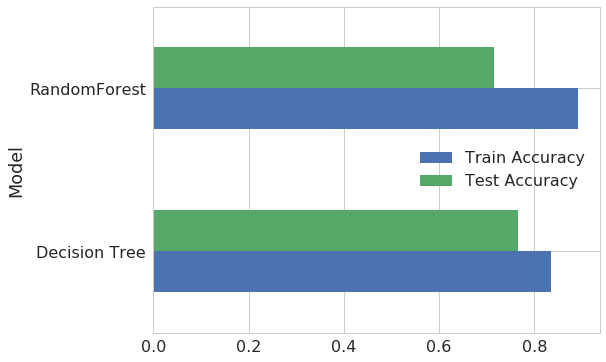

In [323]:
tree_score_ds.plot(kind='barh', x='Model', figsize=(8,6))

### logistic

In [324]:
logistic = LogisticRegression(random_state=10)
logistic.fit(X_train, y_train)
print("Train set accuracy = ", logistic.score(X_train, y_train))
print("Test set accuracy = ", logistic.score(X_test, y_test))
print("CV 10fold = ", cross_val_score(logistic, X, y, cv=10).mean())

Train set accuracy =  0.775933609959
Test set accuracy =  0.79012345679
CV 10fold =  0.779595588235


### SVC

In [325]:
svc = SVC(random_state=10)
svc.fit(X_train, y_train)
print("Train set accuracy = ", svc.score(X_train, y_train))
print("Test set accuracy = ", svc.score(X_test, y_test))
print("CV 10fold = ", cross_val_score(svc, X, y, cv=10).mean())

Train set accuracy =  0.809128630705
Test set accuracy =  0.79012345679
CV 10fold =  0.779595588235


### KNN

In [326]:
knn = KNeighborsClassifier(weights='distance', n_neighbors=20)
knn.fit(X_train, y_train)
print("Train set accuracy = ", knn.score(X_train, y_train))
print("Test set accuracy = ", knn.score(X_test, y_test))
print("CV 10fold = ", cross_val_score(knn, X, y, cv=10).mean())

Train set accuracy =  0.892116182573
Test set accuracy =  0.777777777778
CV 10fold =  0.754595588235


### Naive Bayse

In [327]:
nb = MultinomialNB(alpha=.1)
nb.fit(X_train, y_train)
print("Train set accuracy = ", nb.score(X_train, y_train))
print("Test set accuracy = ", nb.score(X_test, y_test))
print("CV 10fold = ", cross_val_score(nb, X, y, cv=10).mean())

Train set accuracy =  0.775933609959
Test set accuracy =  0.79012345679
CV 10fold =  0.779595588235


### Neural Network(MLP)

In [328]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 4), random_state=10, max_iter=1000
                  )

mlp.fit(X_train, y_train)
print("Train set accuracy = ", mlp.score(X_train, y_train))
print("Test set accuracy = ", mlp.score(X_test, y_test))
print("CV 10fold = ", cross_val_score(mlp, X, y, cv=10).mean())

Train set accuracy =  0.850622406639
Test set accuracy =  0.666666666667
CV 10fold =  0.723713235294


In [329]:
def drawConfusionMatric(confusion_matric, name):

    plt.figure(figsize=(3,2))
    cm_ds = pd.DataFrame(confusion_matric, columns=["강남","판교/정자"], index=["강남","판교/정자"])
#     cm_ds.columns.name="Predicted"
#     cm_ds.index.name = "Actual"
    sns.heatmap(cm_ds, cmap='Blues',annot=True, fmt="d", vmax=20, cbar=False)
    plt.title(name)

In [333]:
confusion_matric = metrics.confusion_matrix(y_test, tree.predict(X_test))

confusion_matric

array([[57,  7],
       [12,  5]], dtype=int64)

In [335]:
sns.set(style="whitegrid", rc={'font.family':'nanumsquare', 'figure.figsize': (12, 5)}, font_scale=1.4)

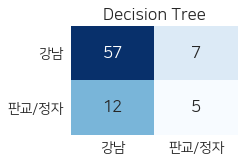

In [336]:
drawConfusionMatric(confusion_matric, "Decision Tree")

,importance
seat_loc,0.390400
행동,0.207413
복장,0.136080
연령대,0.106455
이어폰여부,0.080634
성별,0.079017


C:\Users\hanbum\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


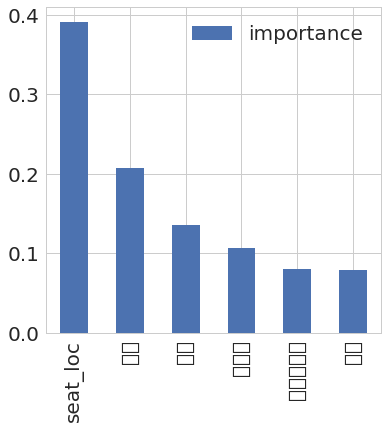

In [337]:
randomforest

feature_importance_ds = pd.DataFrame(data=randomforest.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance_ds.sort_values(['importance'], ascending=False, inplace=True)

sns.set(style="whitegrid", rc={'font.family':'AppleGothic', 'figure.figsize': (12, 5)}, font_scale=2)

feature_importance_ds.plot(kind='bar', figsize=(6,6))
feature_importance_ds

----------------------------------------------------------------------------

+ Correlation 
    + 상관계수측정을 위해 categorical data -> number type 변환
    + categorical value --> label encoding --> one hot encoding(binary) 
    --> correlation matrix --> clustering by correlation <br>

(Bivariate Distribution Plot??)

----------------------------------------------------------------------------

+ Modeling <br>
    + Modeling Overview : feature / classfication or regression / imbalanced data / data 건수 <br>
    
    + Model baseline : data의 특성에 따라
    
    + dataset 분리 : trainset / testset
    
    + Classification algorithm : <br>
        Tree - Decision / randomforest / gradient boosting <br>
        Regression - Logistic <br>
        SVM - SVC <br>
        KNN - KNeighbors classifier <br>
        Bayesian - Multinomial NB <br>
        Neural Network - MLPClassifier <br>
                                 
    + Featur Importances --> RF에서 불순도 감소분으로 각 Feature들의 중요도를 가늠 --> 변수 선택으로도 사용가능
    
----------------------------------------------------------------------------

- Metric (Confusion Matrix)
    - Precision / Recall
    

### 2. 설문 조사 데이터 탐색

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


%cd C:\Users\hanbum\Desktop\2018\work\2. Project\3. Personal\tacademy\1. python_eda

pd.options.display.max_rows = 10
%matplotlib inline

C:\Users\hanbum\Desktop\2018\work\2. Project\3. Personal\tacademy\1. python_eda


In [5]:
#load data

survey = pd.read_csv('class-survey-sample.csv',encoding='utf-8')
survey.head()

,타임스탬프,닉네임,직업,성별,나이,복장,상의옷색상,하의옷색상,하의옷종류,신발색상,신발종류,사는곳,전공,실습환경OS
0,2017. 10. 16 오전 5:57:16,닉1,대학생,남,20,평상복,흰색,흰색,청바지,흰색,구두,강남,컴공,맥OS
1,2017. 10. 16 오전 5:57:16,닉2,대학생,남,20,평상복,흰색,흰색,청바지,흰색,구두,강남,컴공,맥OS
2,2017. 10. 16 오전 5:57:16,닉3,대학생,남,20,평상복,흰색,노랑,청바지,흰색,구두,강남,컴공,맥OS
3,2017. 10. 16 오전 5:57:16,닉4,대학생,남,20,평상복,흰색,노랑,청바지,흰색,구두,강남,컴공,맥OS
4,2017. 10. 16 오전 5:57:16,닉5,대학생,남,20,평상복,흰색,흰색,청바지,흰색,구두,강남,컴공,맥OS


In [6]:
#basic information check
print(survey.index)
print(survey.columns)

RangeIndex(start=0, stop=43, step=1)
Index(['타임스탬프', '닉네임', '직업', '성별', '나이', '복장', '상의옷색상', '하의옷색상', '하의옷종류',
       '신발색상', '신발종류', '사는곳', '전공', '실습환경OS'],
      dtype='object')


In [7]:
#변수별로 unique value 찾기
column_list = list(set(survey))
   
for i in range(14):
    print(survey[column_list[i]].unique())

['남' '여']
['흰색' '노랑' '검정' '회색' '파랑']
['컴공' '정보통신' '통계' '경영' '회계' '마켓팅']
['강남' '강북' '강동' '강서' '경기남부' '경기북부' '경기동부' '경기서부']
['맥OS' '윈도우OS']
['대학생' '대학원생' '예비 스타트업' '재직자' '취업준비생']
['흰색' '검정' '파랑' '빨강']
[20 25 30 35 40]
['흰색' '노랑' '검정' '회색' '파랑' '주황']
['청바지' '치마' '면바지' '반바지']
['평상복' '캐주얼' '정장']
['닉1' '닉2' '닉3' '닉4' '닉5' '닉6' '닉7' '닉8' '닉9' '닉10' '닉11' '닉12' '닉13' '닉14'
 '닉15' '닉16' '닉17' '닉18' '닉19' '닉20' '닉21' '닉22' '닉23' '닉24' '닉25' '닉26'
 '닉27' '닉28' '닉29' '닉30' '닉31' '닉32' '닉33' '닉34' '닉35' '닉36' '닉37' '닉38'
 '닉39' '닉40' '닉41' '닉42' '닉43']
['구두' '런닝화' '농구화' '단화']
['2017. 10. 16 오전 5:57:16']


In [8]:
# unique value 개수 세기

for i in range(14):
    print(survey[column_list[i]].value_counts())

남    33
여    10
Name: 성별, dtype: int64
파랑    11
노랑     9
검정     9
회색     8
흰색     6
Name: 하의옷색상, dtype: int64
통계      14
컴공      10
정보통신     7
경영       6
마켓팅      4
회계       2
Name: 전공, dtype: int64
강남      8
경기남부    8
강동      7
강서      6
강북      6
경기북부    4
경기동부    2
경기서부    2
Name: 사는곳, dtype: int64
맥OS      23
윈도우OS    20
Name: 실습환경OS, dtype: int64
취업준비생      19
대학생        18
대학원생        3
재직자         2
예비 스타트업     1
Name: 직업, dtype: int64
흰색    23
검정    10
파랑     8
빨강     2
Name: 신발색상, dtype: int64
20    11
30    10
25    10
40     6
35     6
Name: 나이, dtype: int64
흰색    10
회색    10
노랑     6
파랑     6
검정     6
주황     5
Name: 상의옷색상, dtype: int64
청바지    30
면바지     6
반바지     4
치마      3
Name: 하의옷종류, dtype: int64
평상복    29
캐주얼     8
정장      6
Name: 복장, dtype: int64
닉16    1
닉29    1
닉35    1
닉26    1
닉6     1
      ..
닉33    1
닉8     1
닉5     1
닉4     1
닉20    1
Name: 닉네임, Length: 43, dtype: int64
런닝화    26
구두      7
농구화     6
단화      4
Name: 신발종류, dtype: int64
2017. 10. 16 오전 5:57:16  

In [9]:
# Clustering 
# (1). Variable selection 

feature_name = ['닉네임', '복장','상의옷색상','하의옷색상','하의옷종류','신발색상','신발종류']
survey_hc = survey[feature_name]

In [10]:
survey_hc.set_index('닉네임', inplace = True)

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import defaultdict

In [12]:
# (2). label encoding
le_enc_dict = defaultdict(LabelEncoder)
le_feature = survey_hc.apply(lambda x : le_enc_dict[x.name].fit_transform(x))

In [13]:
le_feature.head()

,복장,상의옷색상,하의옷색상,하의옷종류,신발색상,신발종류
닉네임,,,,,,
닉1,2,5,4,2,3,0
닉2,2,5,4,2,3,0
닉3,2,5,1,2,3,0
닉4,2,5,1,2,3,0
닉5,2,5,4,2,3,0


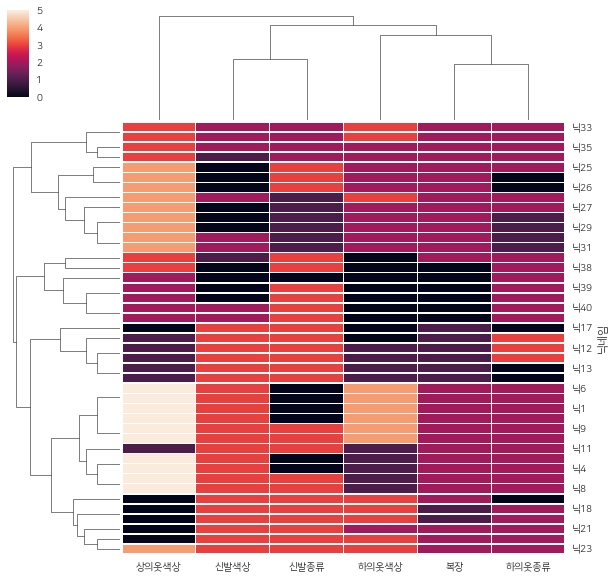

In [17]:
# hierarchical clustering 적용

sns.set(style ='whitegrid', font_scale=1, font='NanumSquare')
g = sns.clustermap(le_feature,metric='jaccard', linewidths=.5)